# ＜Numpyによる演習＞：回帰分析

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 単回帰

## 訓練データ生成

In [2]:
n_sample = 100
var = .2

def linear_func(x):
    return 2 * x + 5

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()

xs: (100,)
ys_true: (100,)
ys: (100,)


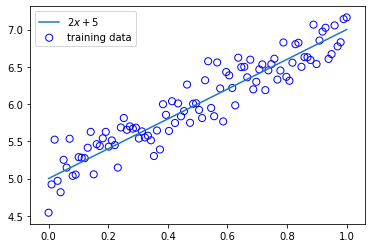

In [3]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = linear_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

## 学習

１次関数$y(x) = a x + b$における、$a$と$b$を求める。

訓練データ$X = [x_{1}, x_{2}, ..., x_{n}]^{\mathrm{T}}, \boldsymbol{y} = [y_{1}, y_{2}, ..., y_{n}]^{\mathrm{T}}$に対して、最小化する目的関数は$L = \sum_{i=1}^{n} \left( y_{i} - (a x_{i} + b) \right)^2$と書け、

$\frac{\partial L}{\partial a} = -2\sum_{i=1}^{n} \left( y_{i} - (a x_{i} + b) \right) x_{i} = 0$

$\frac{\partial L}{\partial b} = -2\sum_{i=1}^{n} \left( y_{i} - (a x_{i} + b) \right) = 0 \cdots (1)$

より、目的関数を最小にする$a, b$は以下のように求まる。

\begin{eqnarray}
\left( 
\begin{array}{cc}
\sum_{i=1}^{n} x_{i}^{2} & \sum_{i=1}^{n} x_{i} \\
\sum_{i=1}^{n} x_{i} & n
\end{array}
\right)
\left( 
\begin{array}{cc}
\hat{a} \\
\hat{b}  
\end{array}
\right)
&=&
\left( 
\begin{array}{cc}
\sum_{i=1}^{n} x_{i} y_{i} \\
\sum_{i=1}^{n} y_{i}  
\end{array}
\right) \\ 
\left( 
\begin{array}{cc}
\hat{a} \\
\hat{b}  
\end{array}
\right)
&=&
\frac{1}{n \sum_{i=1}^{n} x_{i}^{2} - (\sum_{i=1}^{n} x_{i})^{2}}
\left( 
\begin{array}{cc}
n & -\sum_{i=1}^{n} x_{i} \\
-\sum_{i=1}^{n} x_{i} & \sum_{i=1}^{n} x_{i}^{2}
\end{array}
\right)
\left( 
\begin{array}{cc}
\sum_{i=1}^{n} x_{i} y_{i} \\
\sum_{i=1}^{n} y_{i}  
\end{array}
\right) \\
&=&
\frac{1}{n \sum_{i=1}^{n} x_{i}^{2} - (\sum_{i=1}^{n} x_{i})^{2}}
\left( 
\begin{array}{cc}
n \sum_{i=1}^{n} x_{i} y_{i} - \sum_{i=1}^{n} x_{i} \sum_{i=1}^{n} y_{i}\\
\sum_{i=1}^{n} x_{i}^{2} \sum_{i=1}^{n} y_{i} -\sum_{i=1}^{n} x_{i} \sum_{i=1}^{n} x_{i} y_{i}
\end{array}
\right) \cdots (2)
\end{eqnarray}

(1), (2)から$\hat{a} = \text{Cov}[x, y] / \text{Var}[x], \hat{b} = \mu_{y} - \hat{a} \mu_{x}$で求める。

In [4]:
#numpy実装の回帰
def train(xs, ys):
    cov = np.cov(xs, ys, ddof=0)
    a = cov[0, 1] / cov[0, 0]
    b = np.mean(ys) - a * np.mean(xs)
    return cov, a, b

cov, a, b = train(xs, ys)
print("cov: {}".format(cov))
print("coef: {}".format(a))
print("intercept: {}".format(b))

cov: [[0.08501684 0.16464466]
 [0.16464466 0.36099457]]
coef: 1.9366124417390687
intercept: 5.042076659869998


In [5]:
#skl実装の回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(xs.reshape(-1, 1), ys.reshape(-1, 1))

print("coef_: {}".format(reg.coef_))
print("intercept_: {}".format(reg.intercept_))

coef_: [[1.93661244]]
intercept_: [5.04207666]


## 予測

入力に対する値を$y(x) = a x + b$で予測する

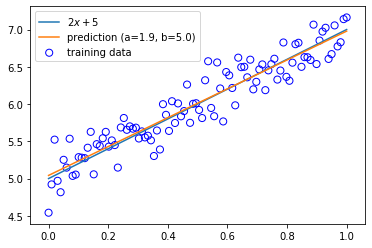

In [6]:
xs_new = np.linspace(0, 1, n_sample)
ys_pred = a * xs_new + b

plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs_new, ys_true, label="$2 x + 5$")
plt.plot(xs_new, ys_pred, label="prediction (a={:.2}, b={:.2})".format(a, b))
plt.legend()
plt.show()

# 多項式回帰
多項式の線形結合で回帰を行う

## 訓練データ生成
sin曲線に正規分布のノイズを付加した点群を生成

In [7]:
n_sample = 10
var = .25

def sin_func(x):
    return np.sin(2 * np.pi * x) 

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs, ys_true, ys):
    plt.scatter(xs, ys,facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
    plt.legend()

xs: (10,)
ys_true: (10,)
ys: (10,)


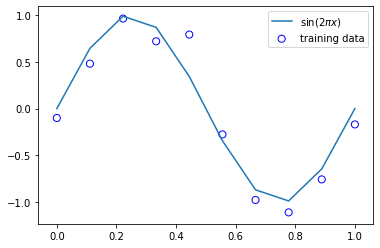

In [8]:
# 生成した点群とsin曲線をプロット

#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

## 学習

モデルとして以下を用いる。

$y(x) = \sum_{i=0}^{d} w_{i} x^{i} = \boldsymbol{w}^{\mathrm{T}} \boldsymbol{\phi(x)}$

ただし、$\boldsymbol{w}=[w_{0}, w_{1}, ..., w_{d}]^{\mathrm{T}}, \boldsymbol{\phi(x)} = [1, x, x^{2}, ..., x^{d}]^{\mathrm{T}}$である。

訓練データ$X, \boldsymbol{y}$に対しては
$\boldsymbol{y} = \Phi \boldsymbol{w}$と書ける。

ただし、$\Phi = [\boldsymbol{\phi}(x_{1}), \boldsymbol{\phi}(x_{2}),.., \boldsymbol{\phi}(x_{n})]^{\mathrm{T}}$である。

よって、最小化する目的関数は$L = ||\boldsymbol{y}  - \Phi \boldsymbol{w}||^2$と書け、

$\frac{\partial L}{\partial \boldsymbol{w}} = - 2 \Phi^{\mathrm{T}} (\boldsymbol{y} - \Phi \boldsymbol{w}) = 0$より、求める回帰係数$\boldsymbol{w}$は以下のように書ける。

$\hat{\boldsymbol{w}} = \left( \Phi^{\mathrm{T}} \Phi \right)^{-1}  \Phi^{\mathrm{T}} \boldsymbol{y}$

In [9]:
def polynomial_features(xs, degree=3):
    """多項式特徴ベクトルに変換
         X = [[1, x1, x1^2, x1^3],
                 [1, x2, x2^2, x2^3],
                   ...                             
                 [1, xn, xn^2, xn^3]]"""
    X = np.ones((len(xs), degree+1))
    X_t = X.T #(10, 4)
    for i in range(1, degree+1):
        X_t[i] = X_t[i-1] * xs
    return X_t.T

In [10]:
Phi = polynomial_features(xs)    # 多項式の値の行列Φを計算
Phi_inv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)    # 行列Φの逆行列とΦの転置行列の積を計算
w = np.dot(Phi_inv, ys)    # 更に、目的変数ysとの積を求めて回帰係数ｗを計算

## 予測

入力を多項式特徴ベクトル$\boldsymbol{\phi(x)}$に変換し、$y = \hat{\boldsymbol{w}} \boldsymbol{\phi(x)}\  (\boldsymbol{y}(x) = \Phi \hat{\boldsymbol{w}})$で予測する。

In [11]:
Phi_test = polynomial_features(xs)
ys_pred = np.dot(Phi_test, w)

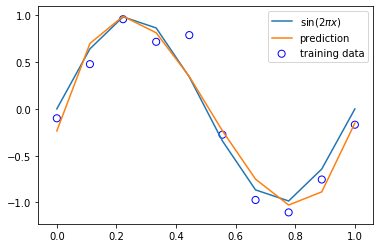

In [12]:
plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
plt.plot(xs, ys_pred, label="prediction")
# for i in range(0, 4):
#     plt.plot(xs, Phi[:, i], label="basis")
plt.legend()
plt.show()

# 重回帰分析

## 訓練データ生成 (3次元入力)
３変数の重回帰分析

In [13]:
np.random.random((10, 3))

array([[0.30041825, 0.41698729, 0.14073679],
       [0.37051449, 0.1257032 , 0.66243074],
       [0.42593061, 0.91837984, 0.42465809],
       [0.08914392, 0.27136749, 0.86558755],
       [0.24499385, 0.8921856 , 0.52662911],
       [0.78015284, 0.21687812, 0.60592581],
       [0.57691985, 0.38119495, 0.00996504],
       [0.38385715, 0.51023578, 0.76251275],
       [0.68862402, 0.99720127, 0.82787408],
       [0.89324062, 0.94259458, 0.77859578]])

In [14]:
n_sample = 100
var = .2

def mul_linear_func(x):
    global ww # 追加
    ww = [1., 0.5, 2., 1.]
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()

In [15]:
# ３変数の線形結合の式に正規分布のノイズを与えた
x_dim = 3

X = np.random.random((n_sample, x_dim))
ys_true = mul_linear_func(X)
ys = add_noise(ys_true, var)

## 学習

モデルとして以下を用いる。

$y(x) = \sum_{i=0}^{d} w_{i} x_{i} = \boldsymbol{w}^{\mathrm{T}}  \boldsymbol{x}$

ただし、陽には書かないが、$\boldsymbol{x}$には定数項のための$1$という要素があることを仮定する。

訓練データ$X, \boldsymbol{y}$に対しては$\boldsymbol{y} = X \boldsymbol{w}$と書ける。

よって、最小化する目的関数は$L = ||\boldsymbol{y}  - X \boldsymbol{w}||^2$と書け、

$\frac{\partial L}{\partial \boldsymbol{w}} = - 2 X^{\mathrm{T}} (\boldsymbol{y} - X \boldsymbol{w}) = 0$より、求める回帰係数$\boldsymbol{w}$は以下のように書ける。

$\hat{\boldsymbol{w}} = \left( X^{\mathrm{T}} X \right)^{-1}  X^{\mathrm{T}} \boldsymbol{y}$

In [16]:
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

X_train = add_one(X)
# pinv = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T)
# w = np.dot(pinv, y_train)

## 予測

入力に対する値を$y(x) = \hat{\boldsymbol{w}}^{\mathrm{T}}  \boldsymbol{x} \ (\boldsymbol{y} = X\hat{\boldsymbol{w}})$で予測する

## パラメータ推定結果

In [17]:
for i in range(len(w)):
    print("w{0}_true: {1:>5.2}   w{0}_estimated: {2:>5.2}".format(i, ww[i], w[i]))

w0_true:   1.0   w0_estimated: -0.24
w1_true:   0.5   w1_estimated: 1.2e+01
w2_true:   2.0   w2_estimated: -3.3e+01
w3_true:   1.0   w3_estimated: 2.2e+01


# ＜scikit-learnによる演習＞：線形回帰モデル-Boston Hausing Data

<h2>1. 必要モジュールとデータのインポート</h2>

In [18]:
#from モジュール名 import クラス名（もしくは関数名や変数名）

from sklearn.datasets import load_boston
from pandas import DataFrame
import numpy as np

In [19]:
# ボストンデータを"boston"というインスタンスにインポート
boston = load_boston()

In [20]:
#インポートしたデータを確認(data / target / feature_names / DESCR)
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [21]:
#DESCR変数の中身を確認
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
#feature_names変数の中身を確認
#カラム名
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [23]:
#data変数(説明変数)の中身を確認
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [24]:
#target変数(目的変数)の中身を確認
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

<h2>2. データフレームの作成</h2>

In [25]:
#　説明変数らをDataFrameへ変換
df = DataFrame(data=boston.data, columns = boston.feature_names)

In [26]:
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)

In [27]:
# 最初の5行を表示
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h1>線形単回帰分析</h1>

以下の線形結合において、最小二乗法によりパラメータ$w_{j} (j=0,1,...,m)$を推定

## $\hat{y} = w^{\mathrm{T}}x + w_{0}= \sum_{j=1}^{m}{w_j+}w_{0}$　（m：パラメータ数、説明変数の数）


## サマリー：sklearnによる線形単回帰分析
	1）sklearnから“Boston house prices dataset”をpandasのDataFrameに読み込む
	2）部屋数（RM）を説明変数に、住宅価格（price）を目的変数にし、sklearnのlinear_modelの
	　　LinearRegressionモデルで価格を予測fit関数でパラメータを推定、predict関数で予測

In [28]:
#カラムを指定してデータを表示
df[['RM']].head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [29]:
# 説明変数
data = df.loc[:, ['RM']].values

In [30]:
#dataリストの表示(1-5)
data[0:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [31]:
# 目的変数
target = df.loc[:, 'PRICE'].values

In [32]:
target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [33]:
## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression

In [34]:
# オブジェクト生成
model = LinearRegression()
#model.get_params()
#model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True,  n_jobs = 1)

In [35]:
# fit関数でパラメータ推定
model.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#予測
model.predict([[1]])

array([-25.5685118])

<h1>重回帰分析(2変数)</h1>

## サマリー：sklearnによる線形重回帰分析（２変数）
    1) 部屋数（RM）と犯罪率（CRIM）の２つを説明変数に、住宅価格（price）を目的変数にし、
    　　sklearnのlinear_modelのLinearRegressionモデルで価格を予測
    2) fit関数でパラメータを推定、predict関数で予測

In [37]:
#カラムを指定してデータを表示
df[['CRIM', 'RM']].head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [38]:
# 説明変数
data2 = df.loc[:, ['CRIM', 'RM']].values
# 目的変数
target2 = df.loc[:, 'PRICE'].values

In [39]:
# オブジェクト生成
model2 = LinearRegression()

In [40]:
# fit関数でパラメータ推定
model2.fit(data2, target2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
model2.predict([[0.2, 7]])

array([29.43977562])

<h1>回帰係数と切片の値を確認</h1>

In [42]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


In [43]:
# 重回帰の回帰係数と切片を出力
print(model2.coef_)
print(model2.intercept_)

[-0.26491325  8.39106825]
-29.24471945192995


<h1>モデルの検証</h1>

<h3>1. 決定係数</h3>

# 決定係数
print('単回帰決定係数: %.3f, 重回帰決定係数 : %.3f' % (model.score(data,target), model2.score(data2,target2)))

## サマリー：sklearnによる線形回帰分析（全ての説明変数）
    1) 訓練データとテストデータに分けて、全ての説明変数を用いて訓練データでパラメータを推定しLinearRegressionモデルで価格を予測
    2) fit関数でパラメータを推定、predict関数で訓練データおよび未知のテストデータで予測
    3) 予測値と目標値との残差をプロット
###    ⇒　バイアスはやや大きいが、バリアンスは比較的小さい（過学習は起こっていない）

In [44]:
# train_test_splitをインポート
from sklearn.model_selection import train_test_split

In [45]:
# 70%を学習用、30%を検証用データにするよう分割
X_train, X_test, y_train, y_test = train_test_split(data, target, 
test_size = 0.3, random_state = 666)
# 単回帰モデル学習用データでパラメータ推定
model.fit(X_train, y_train)
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

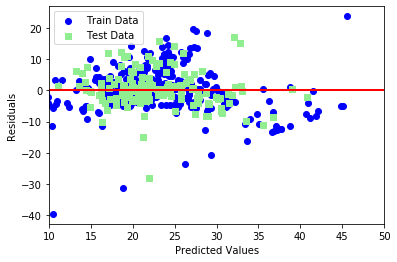

In [46]:
# matplotlibをインポート
import matplotlib.pyplot as plt
# Jupyterを利用していたら、以下のおまじないを書くとnotebook上に図が表示
%matplotlib inline
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10, 50])
plt.show()

In [47]:
# 平均二乗誤差を評価するためのメソッドを呼び出し
from sklearn.metrics import mean_squared_error
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

MSE Train : 44.983, Test : 40.412
R^2 Train : 0.500, Test : 0.434
